**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [4]:
cartoon = cv2.imread("cartoon.bmp")
cartoon_y = cv2.imread("cartoon_y.jpg")
girl = cv2.imread("girl.png") #grayscale image
girl_y = cv2.imread("girl_y.jpg")
fingerprint = cv2.imread("fingerprint.jpg")
fingerprint_y = cv2.imread("fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

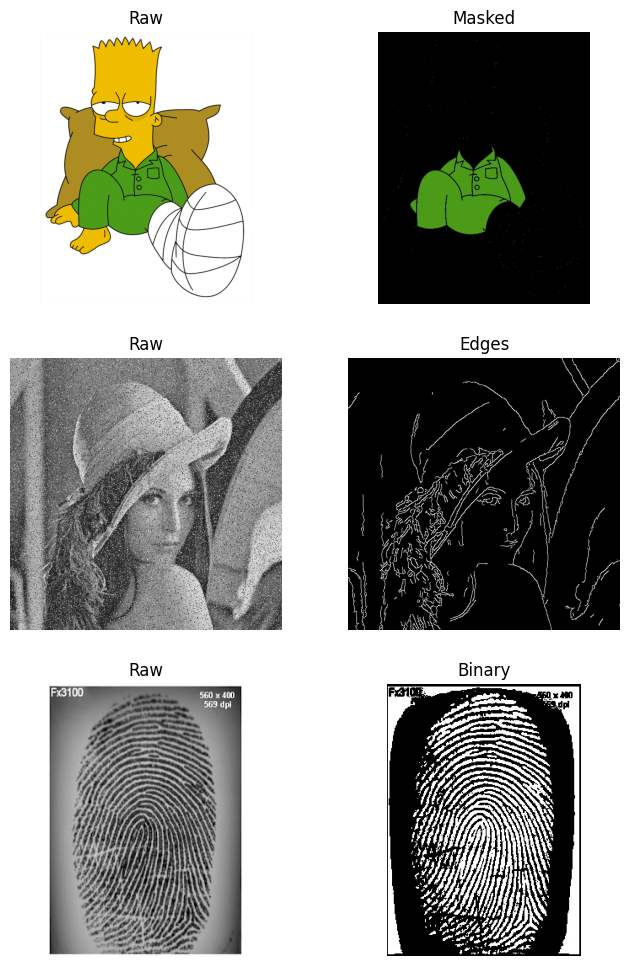

In [5]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [68]:
#START CODE HERE (Do all your processing here)
from PIL import Image
green = np.uint8([[[74, 156, 124]]])
hsvCartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)
hsvGreen = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)
hue = hsvGreen[0][0][0]
if hue >= 165:  # Upper limit for divided red hue
    lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
    upperLimit = np.array([180, 255, 255], dtype=np.uint8)
elif hue <= 15:  # Lower limit for divided red hue
    lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
    upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
else:
    lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
    upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

mask = cv2.inRange(hsvCartoon,lowerLimit, upperLimit)
mask_ = Image.fromarray(mask)

cartoon_y_mentee = cv2.bitwise_and(cartoon, cartoon, mask=mask)
# plt.imshow(cartoon_y_mentee)
# plt.show


#END CODE HERE (the final processed image should be cartoon_y_mentee)

In [69]:
#START CODE HERE (Do all your processing here)
girl_blur = cv2.medianBlur(girl, 5)

edges = cv2.Canny(girl_blur,100,150)
girl_y_mentee = edges

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [62]:
#START CODE HERE (Do all your processing here)
fingerprint_gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)

fingerprint_y_mentee = cv2.adaptiveThreshold(fingerprint_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

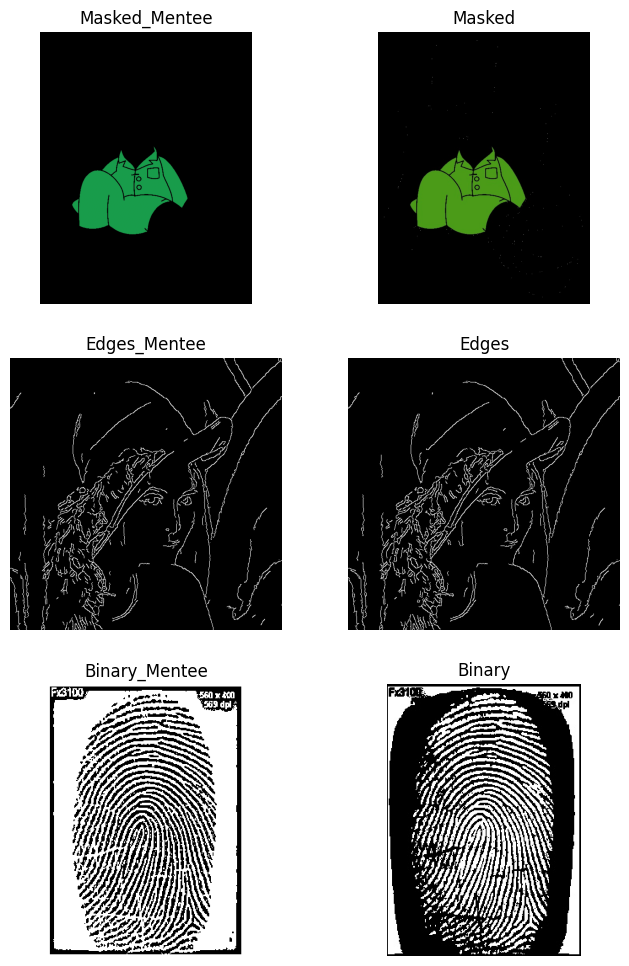

In [70]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()